# **Spatial Patterns, Correlations, and Predictive Modelling of Air Pollutants Across the United States**

## Read Dataset from kaggle

In [2]:
! pip install opendatasets
! pip install geopandas


# Import Libraries

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Data Preparation and Cleaning

In [7]:
# Loading the dataset into a data frame using Pandas
df = pd.read_csv('C:/Users/Admin/Downloads/global air pollution dataset.csv')

In [8]:
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [9]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [11]:
df.shape

(23463, 12)

In [12]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


## Value counts of categorical variables

In [13]:
print(df['AQI Category'].value_counts(), '\n\n',
df['CO AQI Category'].value_counts(), '\n\n',
df['Ozone AQI Category'].value_counts(), '\n\n',
df['NO2 AQI Category'].value_counts(), '\n\n',
df['PM2.5 AQI Category'].value_counts())

Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: AQI Category, dtype: int64 

 Good                              23460
Moderate                              2
Unhealthy for Sensitive Groups        1
Name: CO AQI Category, dtype: int64 

 Good                              21069
Moderate                           1445
Unhealthy for Sensitive Groups      491
Unhealthy                           405
Very Unhealthy                       53
Name: Ozone AQI Category, dtype: int64 

 Good        23448
Moderate       15
Name: NO2 AQI Category, dtype: int64 

 Good                              10208
Moderate                           9075
Unhealthy                          2129
Unhealthy for Sensitive Groups     1624
Very Unhealthy                      255
Hazardous                           172
Name: PM2.5 A

## Range

In [14]:
# Range of AQI Value
range_AQI = df["AQI Value"].max()-df["AQI Value"].min()
print("The range of AQI Value is {}".format(range_AQI))

# Range of CO AQI Value
range_CO_AQI = df["CO AQI Value"].max()-df["CO AQI Value"].min()
print("The range of CO AQI Value is {}".format(range_CO_AQI))

# Range of Ozone AQI Value
range_Ozone_AQI = df["Ozone AQI Value"].max()-df["Ozone AQI Value"].min()
print("The range of Ozone AQI Value is {}".format(range_Ozone_AQI))

# Range of NO2 AQI Value
range_NO2_AQI = df["NO2 AQI Value"].max()-df["NO2 AQI Value"].min()
print("The range of NO2 AQI Value is {}".format(range_NO2_AQI))

# Range of PM2.5 AQI Value
range_PM_AQI = df["PM2.5 AQI Value"].max()-df["PM2.5 AQI Value"].min()
print("The range of PM2.5 AQI Value is {}".format(range_PM_AQI))

The range of AQI Value is 494
The range of CO AQI Value is 133
The range of Ozone AQI Value is 235
The range of NO2 AQI Value is 91
The range of PM2.5 AQI Value is 500


## Find the duplicates

In [15]:
df.duplicated().sum()

0

## Check unique values for each column

In [16]:
print("Unique values in 'Country':")
print(df['Country'].unique())

print("\nUnique values in 'AQI Category':")
print(df['AQI Category'].unique())

print("\nUnique values in 'CO AQI Category':")
print(df['CO AQI Category'].unique())

print("\nUnique values in 'Ozone AQI Category':")
print(df['Ozone AQI Category'].unique())

print("\nUnique values in 'NO2 AQI Category':")
print(df['NO2 AQI Category'].unique())

print("\nUnique values in 'PM2.5 AQI Category':")
print(df['PM2.5 AQI Category'].unique())

Unique values in 'Country':
['Russian Federation' 'Brazil' 'Italy' 'Poland' 'France'
 'United States of America' 'Germany' 'Belgium' 'Egypt' 'China'
 'Netherlands' 'India' 'Pakistan' 'Republic of North Macedonia' 'Colombia'
 'Romania' 'Indonesia' 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'Haiti' 'Somalia' 'Philippines' 'Latvia'
 'Chad' 'New Zealand' 'Tunisia' 'Viet Nam' 'Iran (Islamic Republic of)'
 'Mexico' 'Japan' 'El Salvador' 'Bulgaria' 'Nigeria' 'South Sudan'
 'Guatemala' 'Ireland' 'Turkey' 'Peru' 'Democratic Republic of the Congo'
 'Canada' 'Switzerland' 'Denmark' 'Cameroon' 'Australia' 'Portugal'
 "Côte d'Ivoire" 'Sweden' 'Ethiopia' 'Thailand' 'Hungary' 'Kazakhstan'
 'Israel' 'Spain' 'Myanmar' 'Papua New Guinea' 'Madagascar' 'Lithuania'
 'Ghana' 'Azerbaijan' 'Armenia' 'Ukraine' 'Malaysia' 'Serbia' 'Slovakia'
 'Gambia' 'Ecuador' 'Bosnia and Herzegovina' 'Czechia' 'Argentina'
 'Dominican Republic' 'Guinea' 'Boli

## Finding null values

In [17]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

## Dropping rows with null values

In [18]:
df.dropna(inplace=True)

## Checking the changes now


In [19]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [20]:
# Counting number of unique countries
unique_count = df['Country'].nunique()
print(f"Number of unique values in 'Country' column: {unique_count}")

# Counting number of unique cities
unique_count = df['City'].nunique()
print(f"Number of unique values in 'City' column: {unique_count}")

Number of unique values in 'Country' column: 175
Number of unique values in 'City' column: 23035


In [21]:
#Datatypes
df.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

# The Exploratory analysis and Visualization

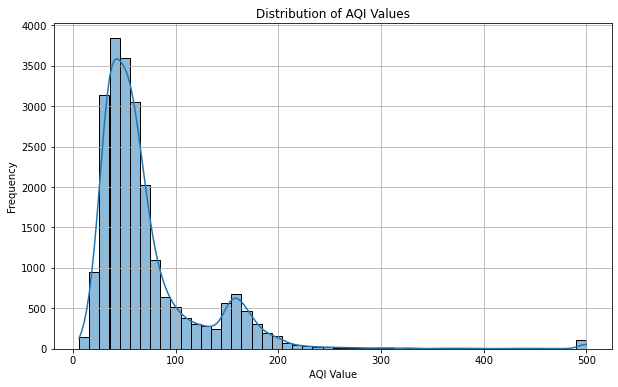

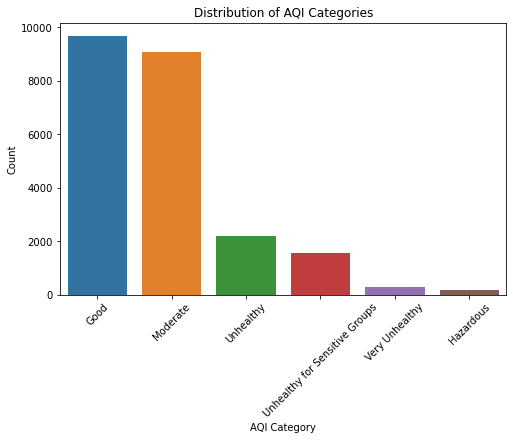

In [22]:
# Creating a histogram to visualize the distribution of AQI values
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AQI Value', bins=50, kde=True)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting a bar chart to show the distribution of AQI categories
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AQI Category', order=df['AQI Category'].value_counts().index)
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Calculating the mean AQI values for each country and sort them in descending order
mean_aqi_by_country = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False)

# Selecting the top 10 countries with the highest mean AQI values
top_10_countries = mean_aqi_by_country.head(10)

# Filtering the dataset to include only data from these top 10 countries
filtered_df = df[df['Country'].isin(top_10_countries.index)]

# Creating a table displaying mean AQI values for the top 10 countries
mean_aqi_table = pd.DataFrame(mean_aqi_by_country.head(10))
mean_aqi_table.reset_index(inplace=True)
mean_aqi_table.columns = ['Country', 'Mean AQI Value']
print(mean_aqi_table)

                Country  Mean AQI Value
0     Republic of Korea      421.000000
1               Bahrain      188.000000
2            Mauritania      179.000000
3              Pakistan      178.788274
4  United Arab Emirates      163.666667
5                 Aruba      163.000000
6                Kuwait      162.000000
7                 Qatar      157.500000
8                 India      152.964228
9               Senegal      152.424242


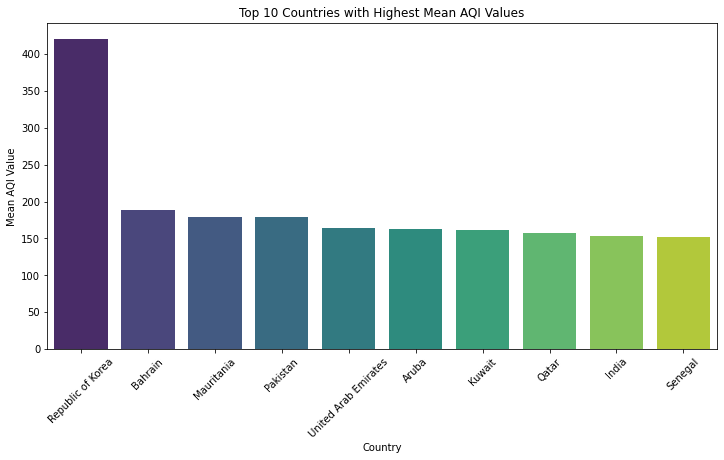

In [24]:
# Creating a bar chart to compare AQI values across the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Country', y='AQI Value', ci=None, palette='viridis', order=top_10_countries.index)
plt.title('Top 10 Countries with Highest Mean AQI Values')
plt.xlabel('Country')
plt.ylabel('Mean AQI Value')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Creating an empty DataFrame to store the most polluted city in each of the top 10 countries
most_polluted_cities = pd.DataFrame(columns=['Country', 'City', 'AQI Value'])

# Iterating through the top 10 countries and find the most polluted city in each
for country in top_10_countries.index:
    country_data = df[df['Country'] == country]
    most_polluted_city = country_data.loc[country_data['AQI Value'].idxmax()][['Country', 'City', 'AQI Value']]

# Sorting the DataFrame by AQI Value in descending order
most_polluted_cities.sort_values(by='AQI Value', ascending=False, inplace=True)

print(most_polluted_cities)

Empty DataFrame
Columns: [Country, City, AQI Value]
Index: []


In [28]:
# Creating a bar chart to compare AQI values of the most polluted cities
plt.figure(figsize=(12, 6))
sns.barplot(data=most_polluted_cities, x='AQI Value', y='City')
plt.title('Most Polluted Cities in the Top 10 Countries')
plt.xlabel('AQI Value')
plt.ylabel('City')
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 864x432 with 0 Axes>

In [29]:
# Sorting the DataFrame by AQI Value in descending order to find the most polluted cities
top_10_polluted_cities = df.sort_values(by='AQI Value', ascending=False).head(10)

# Creating a table of the top 10 most polluted cities with 'Country,' 'City,' and 'AQI Value' columns
top_10_polluted_cities_table = top_10_polluted_cities[['Country', 'City', 'AQI Value']]

print("Top 10 Most Polluted Cities:")
print(top_10_polluted_cities_table)

Top 10 Most Polluted Cities:
                  Country        City  AQI Value
9107                India  Faridnagar        500
8101                India     Gopamau        500
12721               India   Jalalabad        500
17141               India   Pilibanga        500
6990                India         Nuh        500
12354               India       Hansi        500
2858                India      Bareli        500
20567               India       Sasni        500
22259  Russian Federation       Tynda        500
21639               India  Jhunjhunun        500


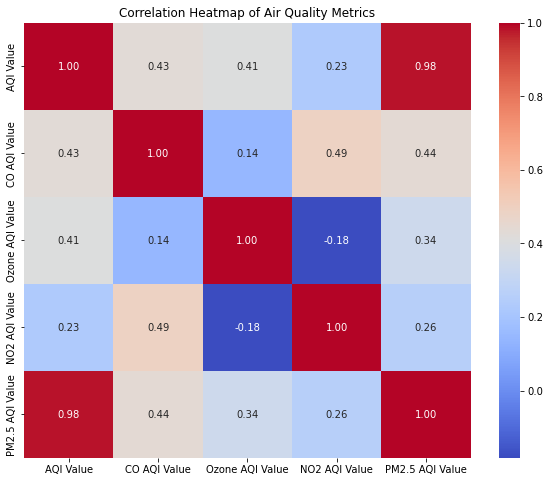

In [30]:
# Selecting relevant columns for correlation analysis
corr_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Calculating the correlation matrix
correlation_matrix = df[corr_columns].corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Air Quality Metrics')
plt.show()

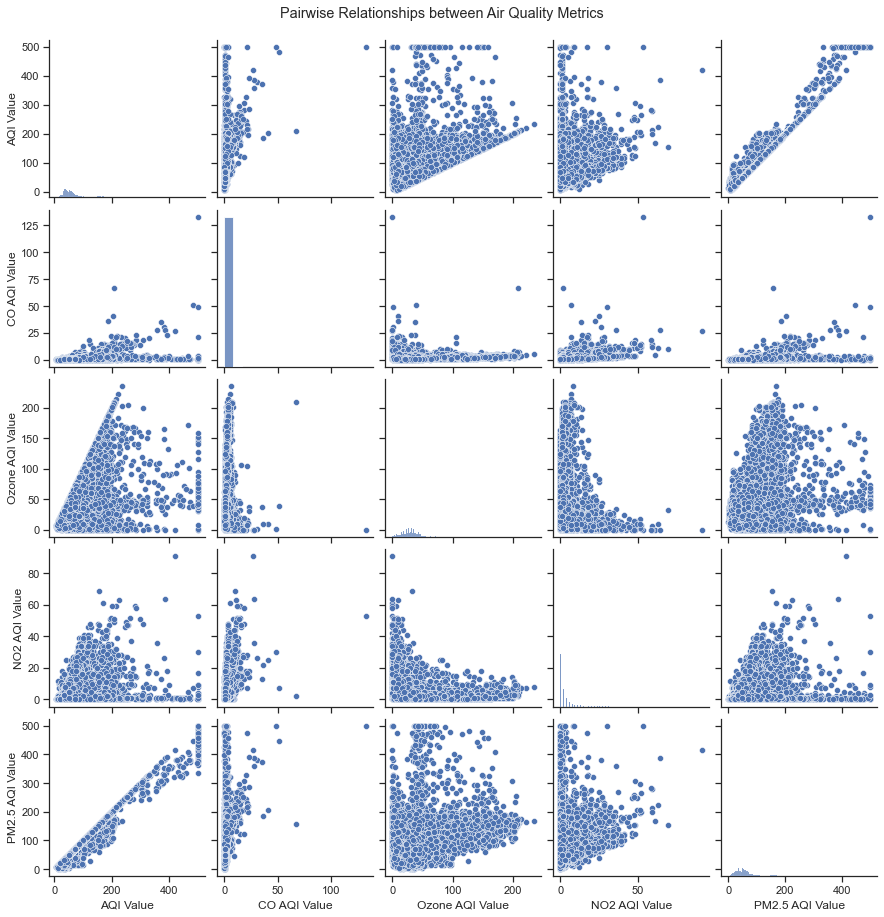

In [31]:
# Creating a pairplot to visualize pairwise relationships between air quality metrics
sns.set(style="ticks")
pairplot_df = df[corr_columns]
sns.pairplot(pairplot_df, kind="scatter")
plt.suptitle('Pairwise Relationships between Air Quality Metrics', y=1.02)
plt.show()

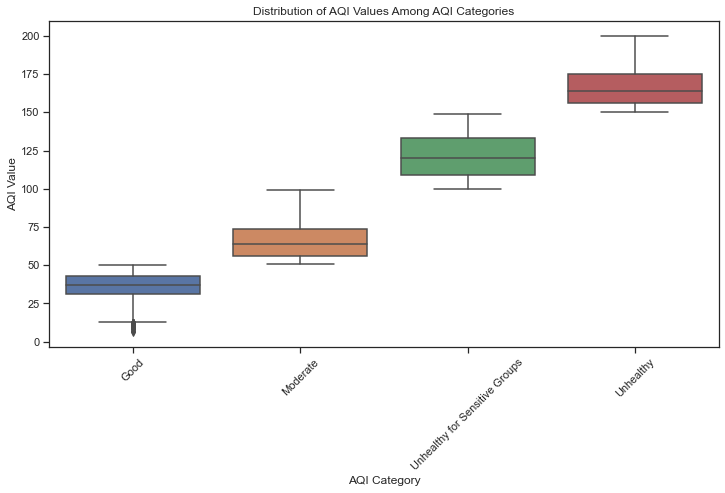

In [32]:
# Creating a box plot to visualize the distribution of AQI values within each AQI category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AQI Category', y='AQI Value', order=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy'])
plt.title('Distribution of AQI Values Among AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.show()

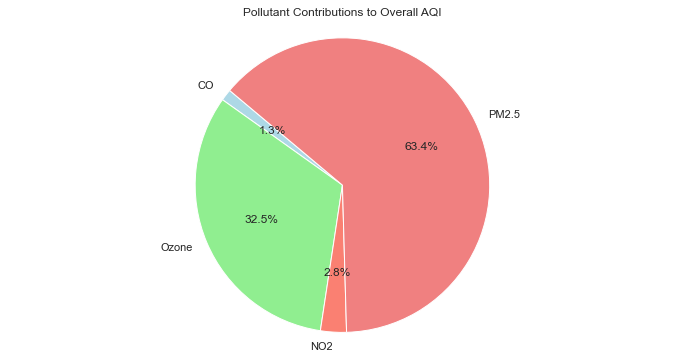

In [33]:
# Calculating the mean values of pollutant concentrations for each pollutant
mean_CO = df['CO AQI Value'].mean()
mean_Ozone = df['Ozone AQI Value'].mean()
mean_NO2 = df['NO2 AQI Value'].mean()
mean_PM25 = df['PM2.5 AQI Value'].mean()

# Calculating the mean values as a percentage of the overall AQI
total_mean_AQI = (mean_CO + mean_Ozone + mean_NO2 + mean_PM25) / 4.0

percentage_CO = (mean_CO / total_mean_AQI) * 100
percentage_Ozone = (mean_Ozone / total_mean_AQI) * 100
percentage_NO2 = (mean_NO2 / total_mean_AQI) * 100
percentage_PM25 = (mean_PM25 / total_mean_AQI) * 100

# Creating separate pie charts to show pollutant contributions
labels = ['CO', 'Ozone', 'NO2', 'PM2.5']
sizes = [percentage_CO, percentage_Ozone, percentage_NO2, percentage_PM25]
colors = ['lightblue', 'lightgreen', 'salmon', 'lightcoral']

# Creating a pie chart for pollutant contributions
plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pollutant Contributions to Overall AQI')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Spatial Patterns

C:\Users\Admin\AppData\Local\Temp\ipykernel_6888\3818575677.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1080x720 with 0 Axes>

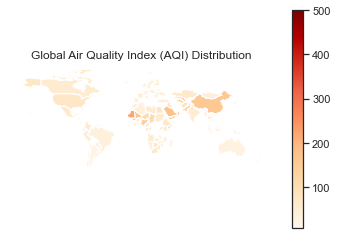

<Figure size 1080x720 with 0 Axes>

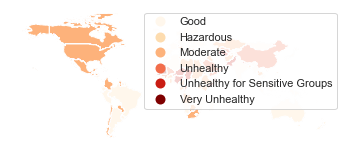

In [35]:


# Loading the world map data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging the world map data with the air pollution data on the basis of country names
merged_data = world_map.merge(df, left_on='name', right_on='Country', how='inner')

# Creating a choropleth map to visualize AQI values across the world
plt.figure(figsize=(15, 10))
merged_data.plot(column='AQI Value', cmap='OrRd', legend=True)
plt.title('Global Air Quality Index (AQI) Distribution')
plt.axis('off')
plt.show()

# Creating a choropleth map to visualize the distribution of AQI categories across the world
plt.figure(figsize=(15, 10))
merged_data.plot(column='AQI Category', cmap='OrRd', legend=True)
plt.title('Global Air Quality Index (AQI) Categories')
plt.axis('off')
plt.show()


#  Correlations

In [36]:

# Select relevant columns for correlation analysis
corr_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Calculate the correlation matrix
correlation_matrix = df[corr_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
AQI Value         1.000000      0.429643         0.405086       0.230845   
CO AQI Value      0.429643      1.000000         0.144838       0.487627   
Ozone AQI Value   0.405086      0.144838         1.000000      -0.182934   
NO2 AQI Value     0.230845      0.487627        -0.182934       1.000000   
PM2.5 AQI Value   0.984518      0.437751         0.340488       0.259084   

                 PM2.5 AQI Value  
AQI Value               0.984518  
CO AQI Value            0.437751  
Ozone AQI Value         0.340488  
NO2 AQI Value           0.259084  
PM2.5 AQI Value         1.000000  


# Predictive Modelling of Air Pollutants

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is the DataFrame containing the air pollution data

# Select relevant features and target variable
features = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
target = 'AQI Value'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create and train the models with parameter tuning
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),  # Adjust max_depth here
    'Random Forest': RandomForestRegressor(max_depth=5),  # Adjust max_depth here
    'AdaBoost': AdaBoostRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print(f'{model_name}:')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared Score: {r2:.2f}')
    print('=' * 30)


Linear Regression:
Mean Squared Error: 85.15
R-squared Score: 0.97
Decision Tree:
Mean Squared Error: 39.55
R-squared Score: 0.99
Random Forest:
Mean Squared Error: 25.02
R-squared Score: 0.99
AdaBoost:
Mean Squared Error: 159.65
R-squared Score: 0.95


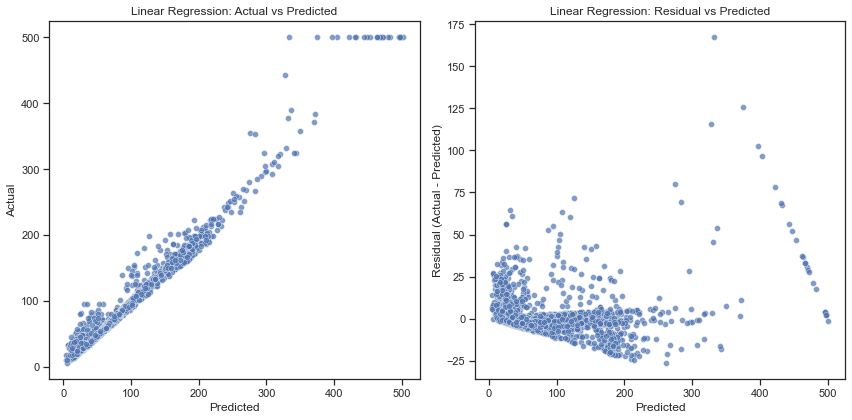

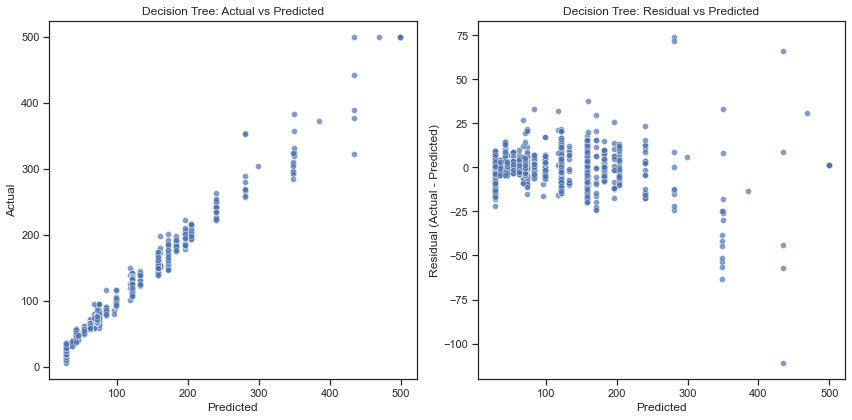

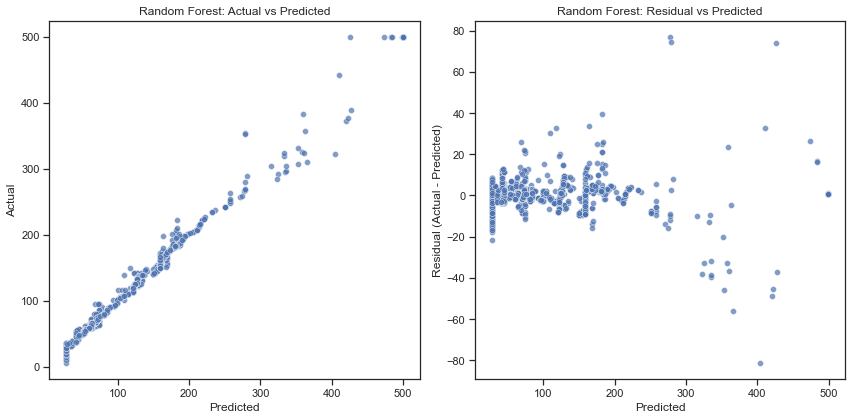

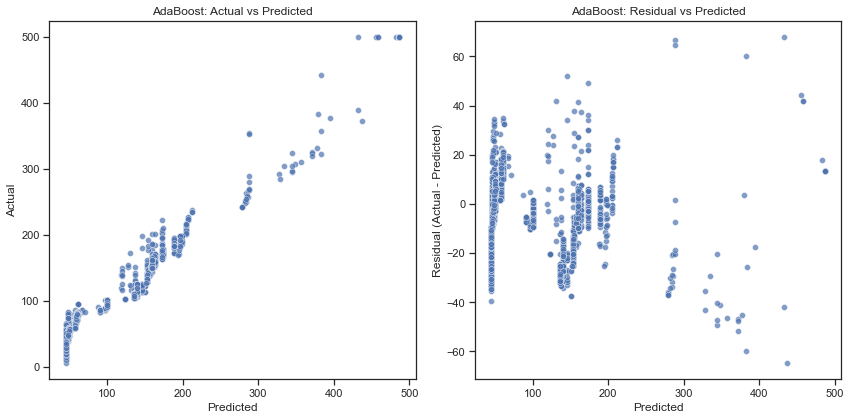

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create actual vs predicted and residual vs predicted plots
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Actual vs Predicted plot
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred, y=y_true, alpha=0.7)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name}: Actual vs Predicted')

    # Residual vs Predicted plot
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_pred, y=y_true - y_pred, alpha=0.7)
    plt.xlabel('Predicted')
    plt.ylabel('Residual (Actual - Predicted)')
    plt.title(f'{model_name}: Residual vs Predicted')

    plt.tight_layout()
    plt.show()

# Assuming 'df' is the DataFrame containing the air pollution data
# Assuming 'models' is the dictionary containing trained regression models

for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Plot actual vs predicted and residual vs predicted for each model
    plot_actual_vs_predicted(y_test, y_pred, model_name)
